<a href="https://colab.research.google.com/github/rabiimallek/HeartbeatCategorizationClassification/blob/main/HeartbeatCategorizationClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, tqdm, re, time, itertools, sys
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint
import matplotlib.pyplot as plt

In [7]:
mit_test = pd.read_csv('/content/drive/MyDrive/HeartbeatCategorizationDataset/mitbih_test.csv',header=None)
mit_train = pd.read_csv('/content/drive/MyDrive/HeartbeatCategorizationDataset/mitbih_train.csv', header=None)
ptb_abnormal = pd.read_csv('/content/drive/MyDrive/HeartbeatCategorizationDataset/ptbdb_abnormal.csv', header=None)
ptb_normal = pd.read_csv('/content/drive/MyDrive/HeartbeatCategorizationDataset/ptbdb_normal.csv', header=None)

In [8]:
ptb_normal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
ptb_normal = ptb_normal.drop([187], axis=1)
ptb_abnormal = ptb_abnormal.drop([187], axis=1)

In [10]:
ptb_normal

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Analyse exploratoire des données**
Dans cette étape, nous subirons une AED (Analyse exploratoire des donnée) pour avoir une brève compréhension de nos données. Nous recevons des données concernant l'ECG d'un patient, classées en classes normales et anormales. Nous allons faire quelques tracés pour voir les variations de la fréquence cardiaque d'un patient avec un ECG normal et anormal.

In [11]:
#compter le nombre de valeurs nulles dans chaque colonne du DataFrame mit_train convertir le résultat en un tableau NumPy.
mit_train.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# afficher le 4 premier lignes
mit_train.head(4)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
mit_train.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)

In [14]:
# vérifier la forme de l'ensemble de données
ptb_abnormal.shape, ptb_normal.shape

((10506, 187), (4046, 187))

In [15]:
ptb_abnormal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
ptb_normal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.0,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#extraire une partie spécifique des données `ptb_abnormal`, puis il les aplatit pour obtenir un tableau 1D
flatten_y = ptb_abnormal.values
flatten_y = flatten_y[:, 5:70].flatten()
flatten_y

array([0.93397045, 0.80104256, 0.7497828 , ..., 0.06976745, 0.06078224,
       0.06606765])

# **Visualisation de données**
Pour une meilleure compréhension, nous allons tracer les données de taux ECG normal et anormal pour voir à quoi ressemblent les courbes. Vous trouverez ci-dessous quelques tracés de taux ECG normaux et anormaux.


**Visualisation ECG anormal**

Vous trouverez ci-dessous quelques graphiques montrant la courbe ECG des personnes présentant un taux ECG anormal.

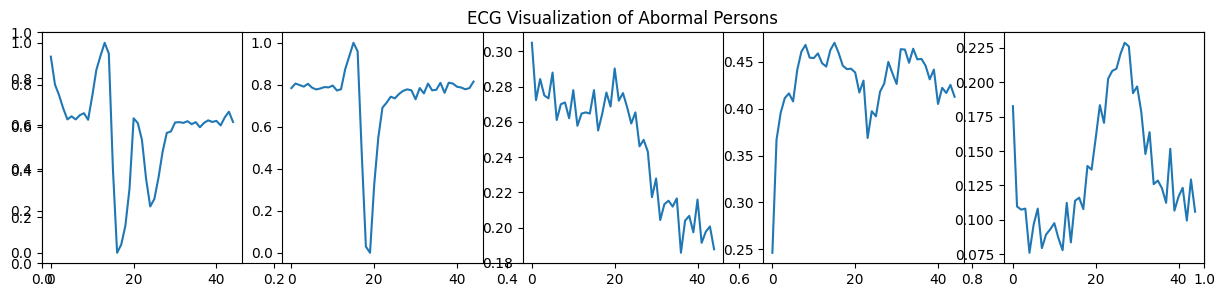

In [18]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Abormal Persons')
plt.subplot(1, 5, 1)
plt.plot(ptb_abnormal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(ptb_abnormal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(ptb_abnormal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(ptb_abnormal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(ptb_abnormal.values[44][5:50])



```
# `Ce texte est au format code`
```

**Normal ECG Visualization**

Vous trouverez ci-dessous les graphiques montrant le taux d'ECG des personnes normales

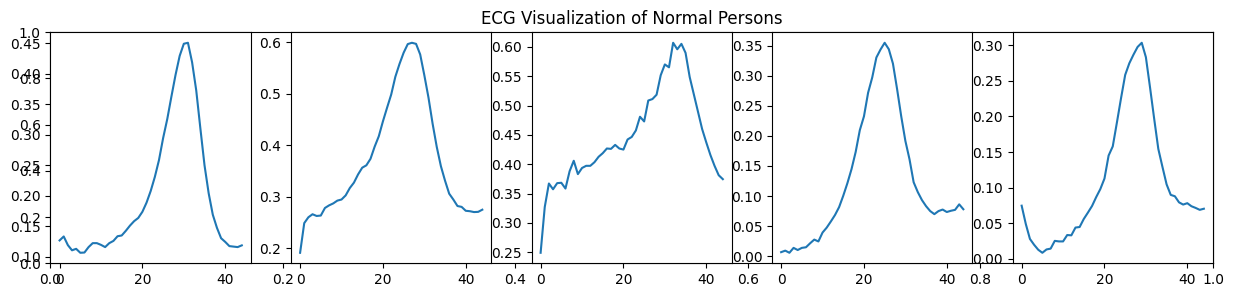

In [19]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Normal Persons')
plt.subplot(1, 5, 1)
plt.plot(ptb_normal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(ptb_normal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(ptb_normal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(ptb_normal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(ptb_normal.values[77][5:50])

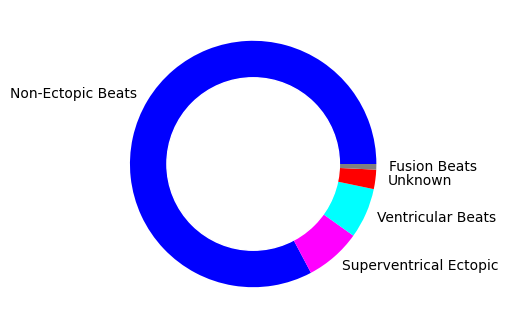

In [20]:
#visualisation de la distribution des battements dans notre ensemble de données
plt.figure(figsize=(5,4))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(mit_train[187].value_counts(), labels=['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats',
                                                'Unknown', 'Fusion Beats'], colors=['blue', 'magenta', 'cyan',
                                                                                   'red', 'grey'])
p = plt.gcf()
p.gca().add_artist(circle)

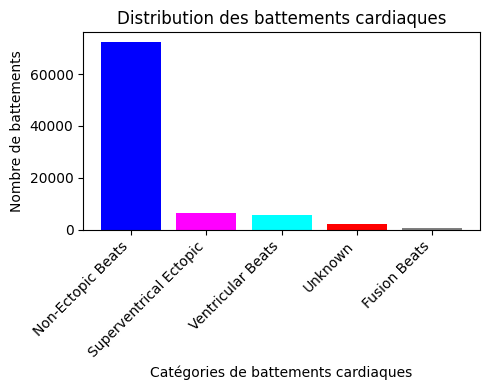

In [21]:
plt.figure(figsize=(5,4))
classes = ['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats', 'Unknown', 'Fusion Beats']
counts = mit_train[187].value_counts()

plt.bar(classes, counts, color=['blue', 'magenta', 'cyan', 'red', 'grey'])
plt.xlabel('Catégories de battements cardiaques')
plt.ylabel('Nombre de battements')
plt.title('Distribution des battements cardiaques')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


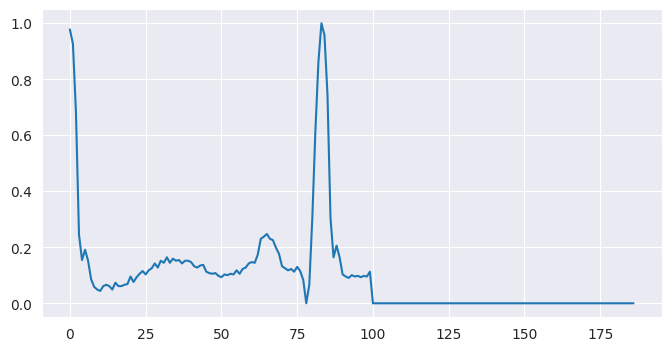

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
plt.plot(mit_train.iloc[0, 0:187])

**Conclusion:**

Nous pouvons conclure des chiffres ci-dessus que pour les personnes ayant un taux ECG normal, les chiffres suivent une courbe en cloche. L'ECG des personnes anormales montre d'autres types de courbes. Nous utiliserons ces informations pour créer notre modèle d'apprentissage automatique pour la classification.

# **Prétraitement des données**
À ce stade, nous subirons un processus de prétraitement des données pour voir si les données doivent être nettoyées. Les données nettoyées sont requises pour l'ajustement du modèle dans les phases suivantes.

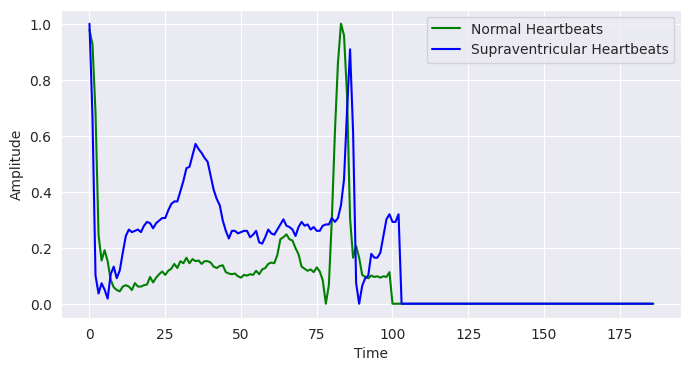

In [23]:
# créer les étiquettes de classe pour notre ensemble de données
data_1 = mit_train[mit_train[187] == 1]
data_2 = mit_train[mit_train[187] == 2]
data_3 = mit_train[mit_train[187] == 3]
data_4 = mit_train[mit_train[187] == 4]

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
plt.plot(mit_train.iloc[0, 0:187], color='green', label='Normal Heartbeats')
plt.plot(data_1.iloc[0, 0:187], color='blue', label='Supraventricular Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

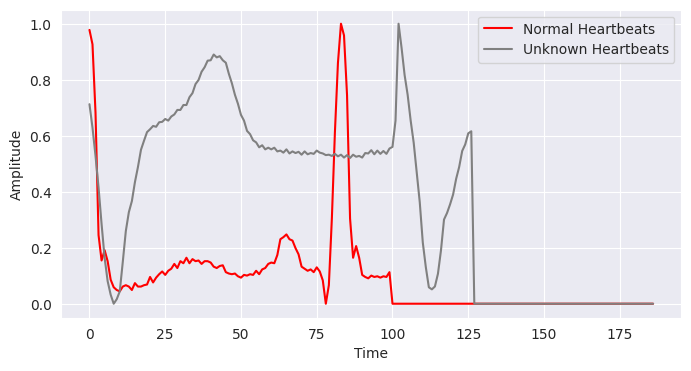

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
plt.plot(mit_train.iloc[0, 0:187], color='red', label='Normal Heartbeats')
plt.plot(data_4.iloc[0, 0:187], color='grey', label='Unknown Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

In [25]:
# 1 pour ptb_abnormal
y_abnormal = np.ones(ptb_abnormal.shape[0])
y_abnormal = pd.DataFrame(y_abnormal)

# 0 pour ptb_normal
y_normal = np.zeros(ptb_normal.shape[0])
y_normal = pd.DataFrame(y_normal)

# fusion de la Dataframe d'origine
X = pd.concat([ptb_abnormal, ptb_normal], sort=True)
y = pd.concat([y_abnormal, y_normal], sort=True)

In [26]:
print(X.shape)
print(y.shape)

(14552, 187)
(14552, 1)


In [27]:
# vérifier s'il y a des valeurs nulles dans les données
ptb_normal.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
# vérifier s'il y a des valeurs nulles dans les données anormales
ptb_abnormal.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Le résultat de la cellule ci-dessus montre qu'il n'y a pas de valeurs nulles dans nos données et que les données peuvent désormais être utilisées pour l'ajustement du modèle. Nous disposons de deux types d'ensembles de données, normaux et anormaux, et ils seront utilisés pour l'ajustement du modèle.

**Argumentation des données**

Étant donné que nos données sont biaisées, nous devons utiliser une argumentation des données afin de pouvoir éliminer les biais des données et effectuer des distributions égales.

In [29]:
from sklearn.utils import resample
data_1_resample = resample(data_1, n_samples=20000,
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000,
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000,
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=20000,
                           random_state=123, replace=True)
data_0 = mit_train[mit_train[187] == 0].sample(n=20000, random_state=123)

In [30]:
train_dataset = pd.concat([data_0, data_1_resample, data_2_resample, data_3_resample,
                          data_4_resample])

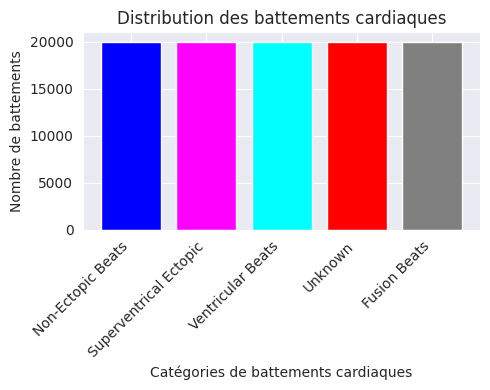

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
labels = ['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats', 'Unknown', 'Fusion Beats']
colors = ['blue', 'magenta', 'cyan', 'red', 'grey']
counts = train_dataset[187].value_counts()

plt.bar(labels, counts, color=colors)
plt.xlabel('Catégories de battements cardiaques')
plt.ylabel('Nombre de battements')
plt.title('Distribution des battements cardiaques')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Créer des variables X et Y**

In [32]:
target_train = train_dataset[187]
target_test = mit_test[187]
target_train.unique()

array([0., 1., 2., 3., 4.])

In [33]:
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)
y_train[:4]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

# **Épissage des données**

Cette étape implique la répartition des données en ensembles d'entraînement et de test. Les données de formation seront utilisées pour former notre modèle et les données de test seront utilisées pour vérifier les performances du modèle sur un ensemble de données invisible. Nous utilisons une répartition de 80 à 20, soit 80 % des données à utiliser pour la formation et 20 % à des fins de tests.

In [34]:
# faire des fractionnements pour train et test
X_train = train_dataset.iloc[:, :-1].values
X_test = mit_test.iloc[:, :-1].values

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 187)
(21892, 187)
(100000, 5)
(21892, 5)


# **Application du modèle**
**Nous utilisons les modèles suivants pour effectuer notre classification :**


*   Classification KNN
*   Machines à vecteurs de support (SVM)
*   Réseau neuronal convolutif (CNN)

**Etapes:**

* Nous allons instancier le modèle
* Après l'inantiation, le modèle sera adapté aux données d'entraînement
* Ensuite, le modèle sera testé sur les données utilisées pour faire des prédictions.

# **KNN**

In [36]:
# Convert multi-label format to single-label format
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)
# Apply KNN to your data
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train_single)

# Predictions
y_pred_train = knn_classifier.predict(X_train)
y_pred_test = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test_single, y_pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.9346793349168646


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Évaluation des performances sur les données d'entraînement
print("Performance on training data:")
print(classification_report(y_train_single, y_pred_train))

# Évaluation des performances sur les données de test
print("Performance on test data:")
print(classification_report(y_test_single, y_pred_test))


Performance on training data:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     20000
           1       0.98      1.00      0.99     20000
           2       0.99      0.99      0.99     20000
           3       0.99      1.00      1.00     20000
           4       1.00      1.00      1.00     20000

    accuracy                           0.99    100000
   macro avg       0.99      0.99      0.99    100000
weighted avg       0.99      0.99      0.99    100000

Performance on test data:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18118
           1       0.42      0.83      0.55       556
           2       0.79      0.95      0.86      1448
           3       0.44      0.81      0.57       162
           4       0.93      0.98      0.95      1608

    accuracy                           0.93     21892
   macro avg       0.71      0.90      0.78     21892
weighted avg       0.

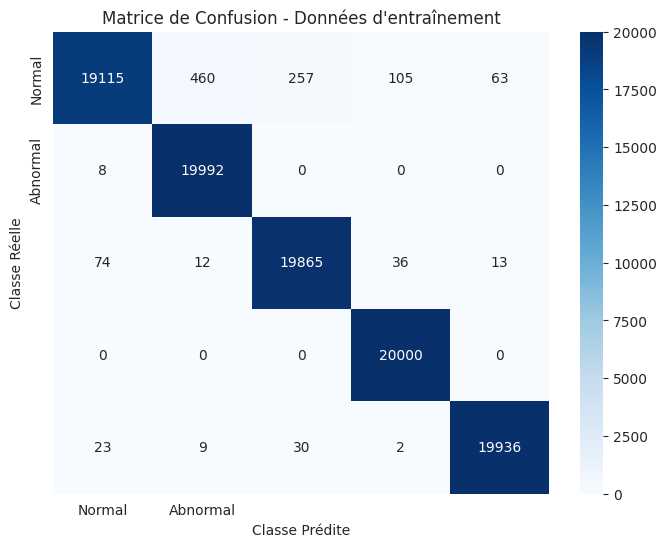

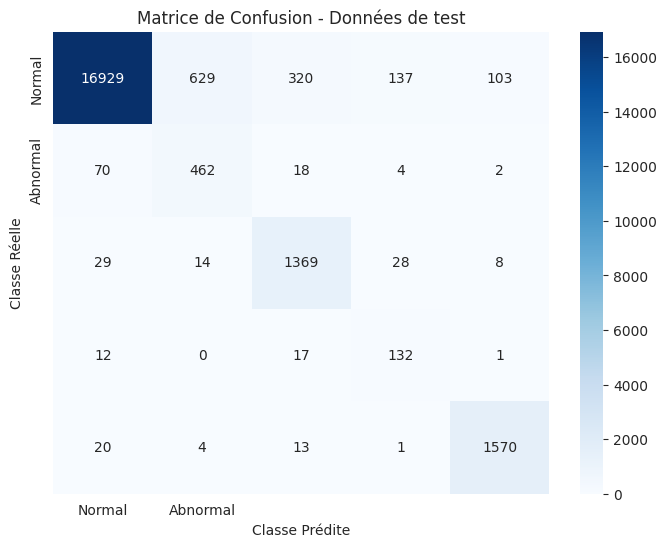

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train_single, y_pred_train)
conf_matrix_test = confusion_matrix(y_test_single, y_pred_test)

# Définir les étiquettes des classes
class_names = ['Normal', 'Abnormal']

# Afficher la matrice de confusion pour les données d'entraînement
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Données d\'entraînement')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()

# Afficher la matrice de confusion pour les données de test
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Données de test')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()


# **RF**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_single)

# Predictions
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test_single, y_pred_test_rf)
print("Accuracy:", accuracy_rf)


Accuracy: 0.9764297460259456


In [40]:

# Evaluation on training data
print("Performance on training data:")
print(classification_report(y_train_single, y_pred_train_rf))

# Evaluation on test data
print("Performance on test data:")
print(classification_report(y_test_single, y_pred_test_rf))


Performance on training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00     20000
           2       1.00      1.00      1.00     20000
           3       1.00      1.00      1.00     20000
           4       1.00      1.00      1.00     20000

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000

Performance on test data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.83      0.73      0.78       556
           2       0.94      0.93      0.94      1448
           3       0.79      0.71      0.75       162
           4       0.98      0.97      0.97      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.87      0.89     21892
weighted avg       0.

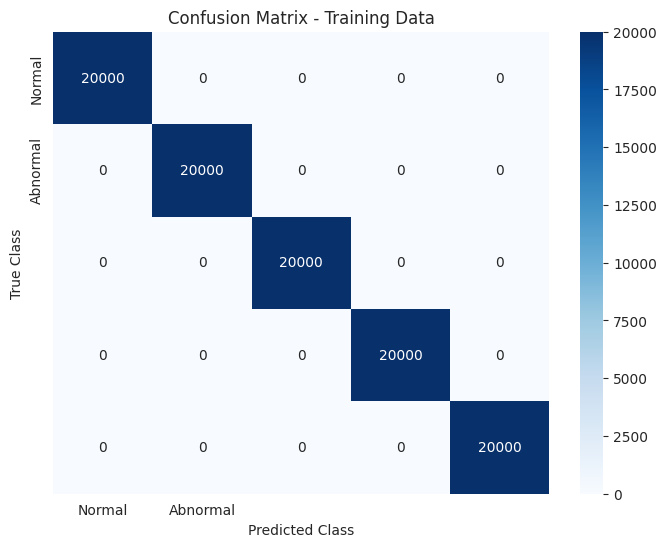

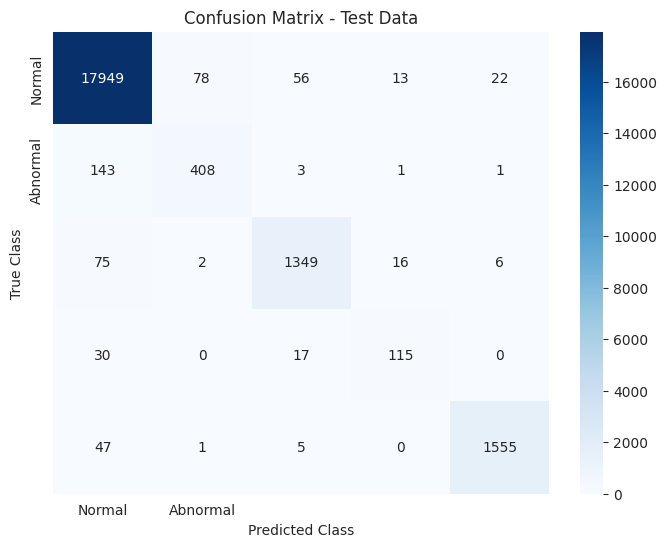

In [41]:
# Calculate confusion matrices
conf_matrix_train_rf = confusion_matrix(y_train_single, y_pred_train_rf)
conf_matrix_test_rf = confusion_matrix(y_test_single, y_pred_test_rf)

# Define class labels
class_names = ['Normal', 'Abnormal']

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# **Arbre de decision**

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train_single)

# Predictions
y_pred_train_dt = dt_classifier.predict(X_train)
y_pred_test_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test_single, y_pred_test_dt)
print("Accuracy:", accuracy_dt)


Accuracy: 0.931162068335465


In [43]:
# Evaluation on training data
print("Performance on training data:")
print(classification_report(y_train_single, y_pred_train_dt))

# Evaluation on test data
print("Performance on test data:")
print(classification_report(y_test_single, y_pred_test_dt))


Performance on training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00     20000
           2       1.00      1.00      1.00     20000
           3       1.00      1.00      1.00     20000
           4       1.00      1.00      1.00     20000

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000

Performance on test data:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18118
           1       0.47      0.73      0.58       556
           2       0.76      0.89      0.82      1448
           3       0.42      0.65      0.51       162
           4       0.89      0.94      0.92      1608

    accuracy                           0.93     21892
   macro avg       0.71      0.83      0.76     21892
weighted avg       0.

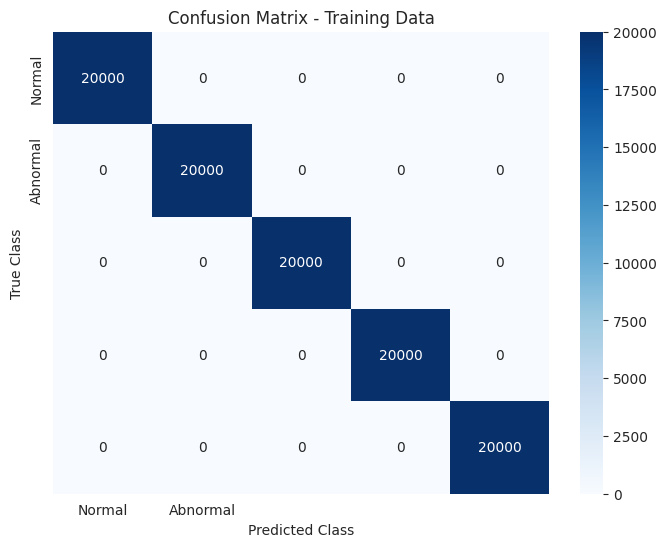

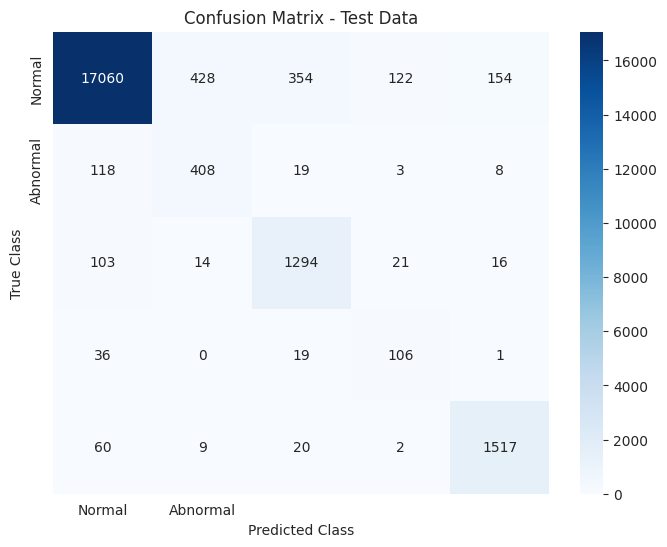

In [44]:
# Calculate confusion matrices
conf_matrix_train_dt = confusion_matrix(y_train_single, y_pred_train_dt)
conf_matrix_test_dt = confusion_matrix(y_test_single, y_pred_test_dt)

# Define class labels
class_names = ['Normal', 'Abnormal']

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


# **SVM**

In [ ]:
from sklearn.svm import SVC

# Initialiser et entraîner le classifieur SVM
svm_classifier = SVC(kernel='rbf')  # Vous pouvez choisir le noyau qui convient le mieux à votre problème
svm_classifier.fit(X_train, y_train_single)

# Prédictions
y_pred_train_svm = svm_classifier.predict(X_train)
y_pred_test_svm = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test_single, y_pred_test_svm)
print("Accuracy:", accuracy)

In [ ]:
# Évaluation des performances sur les données d'entraînement
print("Performance on training data:")
print(classification_report(y_train_single, y_pred_train_svm))

# Évaluation des performances sur les données de test
print("Performance on test data:")
print(classification_report(y_test_single, y_pred_test_svm))


In [ ]:
# Calculer la matrice de confusion sur les données de test pour SVM
conf_matrix_svm = confusion_matrix(y_test_single, y_pred_test_svm)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVM)')
plt.show()


# **modèle de réseau de neurones artificiels (ANN)**

In [ ]:
# Créer le modèle ANN
model = Sequential()

# Ajouter les couches du réseau de neurones
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))  # La couche de sortie avec 5 classes

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

# Afficher la courbe d'apprentissage
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Prédire les étiquettes de classe sur les données d'entraînement
y_train_pred = model.predict(X_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_classes = np.argmax(y_train, axis=1)

# Prédire les étiquettes de classe sur les données de test
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Afficher le rapport de classification pour les données d'entraînement
print("Performance on training data:")
print(classification_report(y_train_classes, y_train_pred_classes))

# Afficher le rapport de classification pour les données de test
print("Performance on test data:")
print(classification_report(y_test_classes, y_test_pred_classes))


# **Deep Learning : CNN**

In [ ]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape


In [ ]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = model()
model.summary()

In [ ]:
logger = CSVLogger('logs.csv', append=True)
his = model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_data=(X_test, y_test), callbacks=[logger])

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
history = his.history
history.keys()

In [ ]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)
y_hat = np.argmax(y_pred, axis = 1)
confusion_matrix(np.argmax(y_test, axis = 1), y_hat)

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), y_hat), annot=True, fmt='0.0f', cmap='RdPu')